# Correlating
One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

In [1]:
# Import dependencies

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import os

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [2]:
# Read csv files

# read training dataset
file_dir = os.path.join("data", "train.csv")
train_df_raw = pd.read_csv(file_dir)

# read testing dataset
file_dir = os.path.join("data", "test.csv")
test_df_raw = pd.read_csv(file_dir)

# read gender_submission
file_dir = os.path.join("data", "gender_submission.csv")
gender_submission_df = pd.read_csv(file_dir)

# combine training and testing data for looping
combined = [train_df_raw, test_df_raw]

# Classifying
We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

In [3]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]

    return ms

In [4]:
# Preview the data

train_df_raw.info()
print('-'*40)
test_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [5]:
train_df_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
missingdata(train_df_raw)

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [8]:
missingdata(test_df_raw)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


In [5]:
train_df_raw[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [6]:
train_df_raw[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [7]:
train_df_raw[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [8]:
train_df_raw[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Charting
How to select the right visualization plots and charts depending on nature of the data and the solution goals.

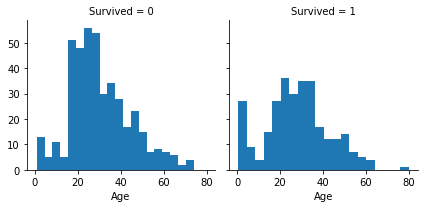

In [9]:
g = sns.FacetGrid(train_df_raw, col='Survived')
g.map(plt.hist, 'Age', bins=20)

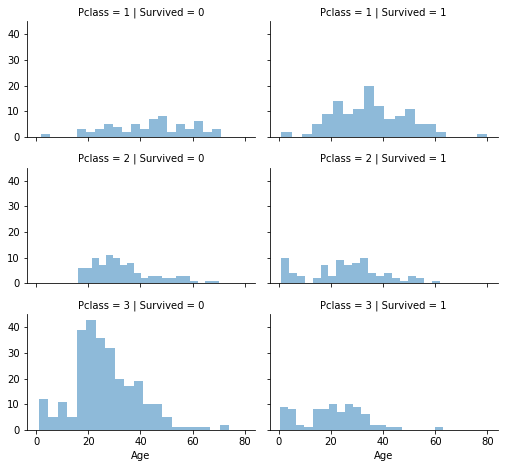

In [10]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df_raw, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

D:\Anaconda\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Anaconda\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


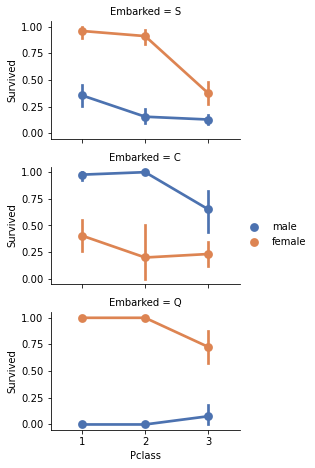

In [11]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df_raw, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

D:\Anaconda\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


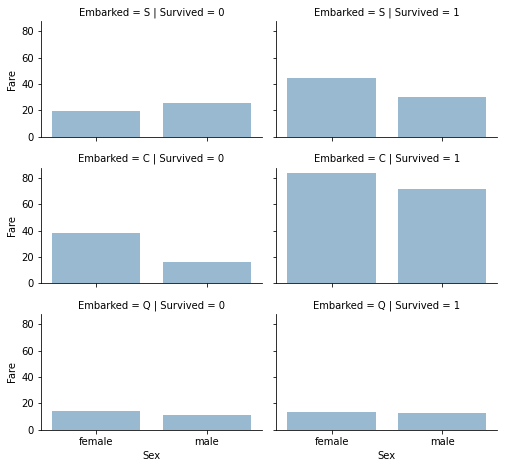

In [12]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df_raw, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

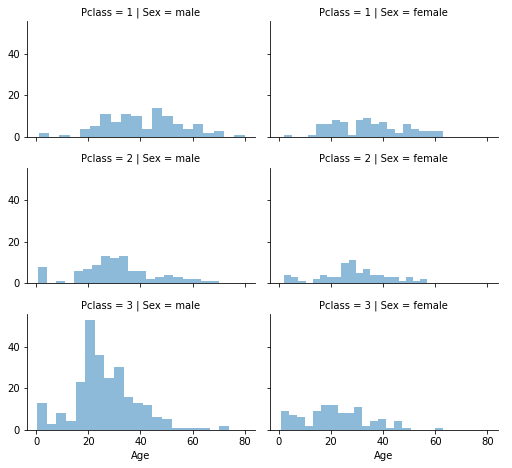

In [13]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df_raw, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# Correcting
We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

In [14]:
# Correcting by dropping features

train_df = train_df_raw.drop(columns=["Ticket", "Cabin"])
test_df = test_df_raw.drop(columns=["Ticket", "Cabin"])
combined = [train_df, test_df]

# Creating
Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

In [15]:
# Creating new title feature extracting from existing name feature

for dataset in combined:
    dataset["Title"] = dataset["Name"].str.extract("([A-Za-z]+)\.", expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
# Replace many titles with a more common name or classify them as Rare

for dataset in combined:
    dataset["Title"] = dataset["Title"].replace(["Capt", "Col", "Countess", "Don", "Dr", "Jonkheer", "Lady", "Major", "Rev", "Sir"], "Rare")
    dataset["Title"] = dataset["Title"].replace(["Mlle", "Ms"], "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [17]:
# Create new family size feature combining SibSp & Parch features

for dataset in combined:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [18]:
# Create another feature to determine if guest is alone

for dataset in combined:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [19]:
# Drop the now unnecessary  Parch, SibSp, and FamilySize features in favor of IsAlone

train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combined = [train_df, test_df]

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Mr,1


# Converting
For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

In [20]:
# Convert the categorical titles to ordinal

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combined:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

test_df["Title"] = test_df["Title"].astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,3,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,3,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,1


In [21]:
# Drop the now unnecessary name column

train_df = train_df.drop(columns='Name')
test_df = test_df.drop(columns='Name')
combined = [train_df, test_df]

In [22]:
# Convert sex categorical feature

for dataset in combined:
    dataset['Sex'] = dataset['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.0,7.2500,S,1,0
1,2,1,1,1,38.0,71.2833,C,3,0
2,3,1,3,1,26.0,7.9250,S,2,1
3,4,1,1,1,35.0,53.1000,S,3,0
4,5,0,3,0,35.0,8.0500,S,1,1


# Completing
Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

In [23]:
# Completing the embark categorical feature

# store the most frequent embark category with mode function
freq_port = train_df.Embarked.dropna().mode()[0]

for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [24]:
# Convert embark feature to numeric

for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.0,7.2500,0,1,0
1,2,1,1,1,38.0,71.2833,1,3,0
2,3,1,3,1,26.0,7.9250,0,2,1
3,4,1,1,1,35.0,53.1000,0,3,0
4,5,0,3,0,35.0,8.0500,0,1,1


In [25]:
# Quick completing and converting of fare numeric feature for testing data

test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,34.5,7.8292,2,1,1
1,893,3,1,47.0,7.0000,0,3,0
2,894,2,0,62.0,9.6875,2,1,1
3,895,3,0,27.0,8.6625,0,1,1
4,896,3,1,22.0,12.2875,0,3,0


In [26]:
# We can now create the fare band

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [27]:
# Convert the fare feature to ordinal values based on the fare band

for dataset in combined:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combined = [train_df, test_df]
    
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.0,0,0,1,0
1,2,1,1,1,38.0,3,1,3,0
2,3,1,3,1,26.0,1,0,2,1
3,4,1,1,1,35.0,3,0,3,0
4,5,0,3,0,35.0,1,0,1,1
5,6,0,3,0,NaN,1,2,1,1
6,7,0,1,0,54.0,3,0,1,1
7,8,0,3,0,2.0,2,0,4,0
8,9,1,3,1,27.0,1,0,3,0
9,10,1,2,1,14.0,2,1,3,0


In [28]:
def estimateAge(df):
    lin_reg = LinearRegression()
    
    train_age = df[df["Age"].isnull()==False]
    test_age = df[df["Age"].isnull()==True]
    
    X_age = train_age.drop(columns="Age")
    y_age = train_age["Age"]
    
    lin_reg.fit(X_age, y_age)
    
    X_age_test = df[df["Age"].isnull()==True].drop(columns="Age").copy()
    pred = lin_reg.predict(X_age_test)
    
    update_age = df[df["Age"].isnull()==True].copy()
    update_age["Age"] = pred

    age_dropped = df.dropna()
    df = pd.merge(age_dropped, update_age, how="outer").sort_values(by='PassengerId', ascending=True)

    return df

In [29]:
# Complete age feature using linear regression model

train_df = estimateAge(train_df)
test_df = estimateAge(test_df)
combined = [train_df, test_df]

train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.000000,0,0,1,0
1,2,1,1,1,38.000000,3,1,3,0
2,3,1,3,1,26.000000,1,0,2,1
3,4,1,1,1,35.000000,3,0,3,0
4,5,0,3,0,35.000000,1,0,1,1
714,6,0,3,0,27.470671,1,2,1,1
5,7,0,1,0,54.000000,3,0,1,1
6,8,0,3,0,2.000000,2,0,4,0
7,9,1,3,1,27.000000,1,0,3,0
8,10,1,2,1,14.000000,2,1,3,0


In [30]:
# Now we can create the age bands

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.598214
1,"(16.336, 32.252]",0.324895
2,"(32.252, 48.168]",0.401786
3,"(48.168, 64.084]",0.428571
4,"(64.084, 80.0]",0.090909


In [31]:
# Convert the age feature to ordinal values based on the age band

for dataset in combined:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,AgeBand
0,1,0,3,0,1.0,0,0,1,0,"(16.336, 32.252]"
1,2,1,1,1,2.0,3,1,3,0,"(32.252, 48.168]"
2,3,1,3,1,1.0,1,0,2,1,"(16.336, 32.252]"
3,4,1,1,1,2.0,3,0,3,0,"(32.252, 48.168]"
4,5,0,3,0,2.0,1,0,1,1,"(32.252, 48.168]"


In [32]:
# Drop the now unnecessary passenger id & age band columns

train_df["Age"] = train_df["Age"].astype(int)
test_df["Age"] = test_df["Age"].astype(int)
train_df = train_df.drop(columns=["PassengerId", "AgeBand"])
combined = [train_df, test_df]

In [33]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1
714,0,3,0,1,1,2,1,1
5,0,1,0,3,3,0,1,1
6,0,3,0,0,2,0,4,0
7,1,3,1,1,1,0,3,0
8,1,2,1,0,2,1,3,0


In [34]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0
5,897,3,0,0,1,0,1,1
6,898,3,1,1,0,2,2,1
7,899,2,0,1,2,0,1,0
8,900,3,1,1,0,1,3,1
9,901,3,0,1,2,0,1,0


# Model, predict and solve
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

Logistic Regression,
KNN or k-Nearest Neighbors,
Support Vector Machines,
Naive Bayes classifier,
Decision Tree,
Random Forrest,
Perceptron,
Artificial neural network,
RVM or Relevance Vector Machine,

In [36]:
X_train = train_df.drop(columns="Survived")
y_train = train_df["Survived"]
X_test = test_df.drop(columns="PassengerId").copy()
X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [37]:
# Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
log_reg.score(X_train, y_train)

0.813692480359147

In [38]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(log_reg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.200920
5,Title,0.408495
4,Embarked,0.244492
6,IsAlone,0.216090
3,Fare,-0.105883
2,Age,-0.679088
0,Pclass,-1.368449


In [40]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc.score(X_train, y_train)

0.8428731762065096

In [44]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
linear_svc.score(X_train, y_train)

D:\Anaconda\envs\PythonData\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8047138047138047

In [41]:
# k-Nearest Neighbors algorithm

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_train, y_train)

0.7833894500561167

In [42]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gaussian.score(X_train, y_train)

0.7721661054994389

In [43]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
perceptron.score(X_train, y_train)

0.7946127946127947

In [45]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)

0.7373737373737373

In [46]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
decision_tree.score(X_train, y_train)

0.8720538720538721

In [48]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

0.8720538720538721

In [49]:
# Create submission dataframe

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred
    })
# submission.to_csv('./submission.csv', index=False)